# Coursera regression models

In [ ]:
In this notebook I will start with implementing a linear univariate regrsssion model, $f_{w,b}$

### Notations

In [ ]:
$a$  scalar

$x^{(i)}$, $y^{(i)}$ is the $i_{th}$ Training Example

$m$   Number of training examples

$b$   parameter: bias
    
$w$   parameter: weight
    
$f_{w,b}(x^{(i)})$ Is the result of the kodel evaluation at $x^{(i)}$ parametized by $w,b$ : $f_{w,b}(x^{(i)}) = wx^{(i)} + b$


In [4]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')

This example will use a simple regression model using two data points: 

In [7]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x train = {x_train}")
print(f"y train = {y_train}")

x train = [1. 2.]
y train = [300. 500.]


Number of training examples/features is denoted by $m$ x_train.shape[0] returns the number of training examples

In [15]:
print(f"Number of training examples: {x_train.shape[0]}")

Number of training examples: 2


We use ($x^{(i)}$, $y^{(i)}$) to denote the $i^{th}$ training example. For instance: 

In [17]:
i = 0
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i},{y_i})")

(x^(0), y^(0)) = (1.0,300.0)


Text(0.5, 0, 'House sizes in (sqr feet)')

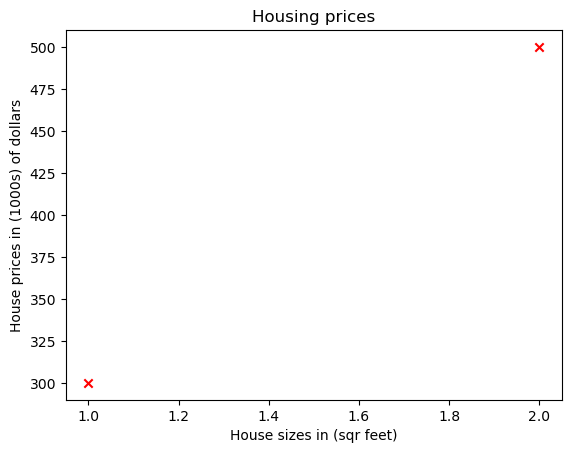

In [18]:
plt.scatter(x_train, y_train,marker='x',c='r')
plt.title("Housing prices")
plt.ylabel("House prices in (1000s) of dollars")
plt.xlabel("House sizes in (sqr feet)")

**w** and **b** are weights and bias: lets's try to see their effect on a regression model

In [46]:
w = 200
b = 100

In [47]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
         x (ndarray(m,)): Data, m examples
         w, b (scalar)  : model parameters
         
     Returns
         f_wb (ndarray(m,)): model prediction
    
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb    
    

In [48]:
tmp_f_wb = compute_model_output(x_train, w, b)

In [49]:
tmp_f_wb

array([300., 500.])

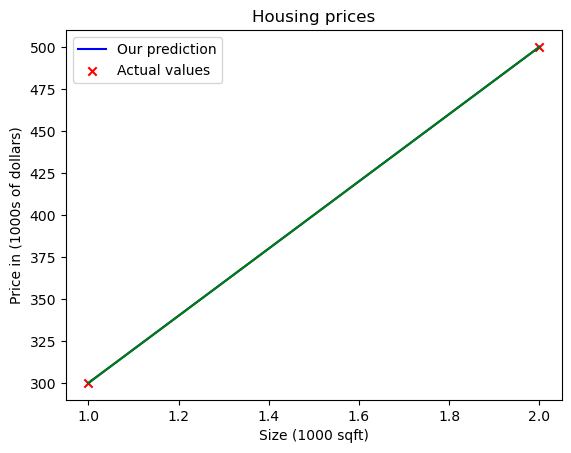

In [50]:
plt.plot(x_train, tmp_f_wb,c='b',label='Our prediction')
plt.scatter(x_train, y_train, marker = 'x',c='r',label='Actual values')
plt.plot(x_train, y_train,c='g')
plt.title("Housing prices")
plt.ylabel("Price in (1000s of dollars)")
plt.xlabel("Size (1000 sqft)")
plt.legend()
plt.show()

In [52]:
w = 200
b = 100
x_i = 1.2
cost_1200_sqft = w * x_i + b
print(f"{cost_1200_sqft:.0f} thousand dollars")

340 thousand dollars


The function is represented as: 
    $f(x)$ = $wx$ + $b$

Linear regression builds a model which establishes a relationship between features and targets. 
- In the example above, the feature was house size and the target was house price
- Once a model's parameters $w$ and $b$ have been determined, the model can be used to make predictions on novel data

### The cost function

The cost function is used to compute the squared error between the predicted values and the true values in a regression model.

The cost function $J(w,b)$ must be minimised as much as possible in order to get a good fit of the regession model.

Remember that $w$ and $b$ are the models parameters, where $w$ is the slope/gradient and $b$ is the y-intercept, 
hence adjusting the $w$ and the $b$ leads to a different value of the predicted value $\hat{y}$.

The cost function takes the prediction $\hat{y}$ and compares it to the target $y$ i.e $\hat{y}$ - $y$, to get the error.

The cost function can be written as: 
    $J_{(w,b)}$ = $\frac{1}{2m} \sum \limits _{i=1} ^ m (\hat{y}^{(i)} - y^{(i)})^2$
    
This is called the squared error function, which can be re-written as: 

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 1} ^ m (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

More mathematical representations:

$$\int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}$$

In [78]:
##### highlighting a dataframe
import numpy as np
import pandas as pd

np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    set_table_attributes('style="font-size: 10px"')

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720
